# Introduction to Time Series Analysis 

## Outline

* Define key time series concepts and properties
* Describe ARIMA model
* Use Box-Jenkins work-flow to estimate an ARIMA model
    * Use graphical tools to pick an ARIMA model
    * Estimate/forecast/evaluate an ARIMA model
    * Model selection


## References  

Some helpful references, arranged by increasing difficulty:  

* Hyndman & Athanasopoulos: “[Forecasting: principles and practice](https://www.otexts.org/fpp)”
* Enders: “Applied Econometric Time Series”
* Hamilton: “Time Series Analysis”

## Time Series Data  

Time series data is a sequence of observations of some quantity of interest, which are collected over time, such as:  

* GDP
* The price of toilet paper or a stock
* Demand for a good
* Unemployment
* Web traffic (clicks, logins, posts, etc.)

### Definition  

We assume a time series, $\{y_t\}$, has the following properties:  

* $y_t$ is an observation of the level of $y$ at time $t$
* $\{y_t\}$ is time series, i.e., the collection of observations:
    * May extend back to $t = 0$ or $t = −\infty$, depending on the problem.
    * E.g., $t \in \{0, \dots, T\}$

### Assumptions  

We assume:  
* Discrete time:
    * Sampling at regular intervals
    * even if process is continuous
* Evenly spaced observations
* No missing observations

variational inference algorithm for sampling 

### Components of a time series  

Think of a time series as consisting of several different components:  
* Trend
* Seasonality
* Cyclic
* Irregular

Can be additive or multiplicative

### Example decomposition from Hyndman et al.  

<img src="images/ts_decomposition.png" width="600">  

### Example time series from Hyndman et al.  

<img src="images/ts_examples.png" width="600">  

## Two popular models  

* ARIMA(p,d,q):
    * Captures key aspects of time series data  
    
* Exponential smoothing (ETS):
    * Smooths out irregular shocks to model trend and seasonality
    * Updates forecast with linear combination of past forecast and current value

## ARIMA Models  

The Box-Jenkins Methodology applies autoregressive moving average models to find the best fit of a time series based on past values.  

**3-stage approach**:  
1. Model Identification
    * Making sure data is stationary
    * Identifying seasonality
    * Using plots of autocorrelation (ACF) and partial autocorrelation (PACF) to decide which autoregressive and/or moving average components to include
2. Parameter Estimation via MLE or non-linear least squares
3. Model Checking by testing the model residuals  

If estimation is inadequate, we return to step 1 and iterate.

### Notation  

* $y_t$ : the level of some value of interest at time $t$
* $\varepsilon_t$ : the value of a shock, $\varepsilon$, at time $t$
* $\hat{y}_{t+h|t}$ is the forecast for $y_{t+h}$ based on the information available at time $t$

### ACF and PACF  

* Autocorrelation Function (ACF)  
    * Measures correlation at adjacent points of the same series  
    
    $$ \rho_y (h) = \frac{\gamma_y (h)}{\gamma_y (0)} $$  
    
    $$ -1 < \rho_y (h) < 1 $$  
    
* Partial Autocorrelation Function (PACF)  
    * On can think of the PACF as the simple correlation between two points separated by a lag $h$, say $y_t$ and $y_{t-h}$, with the effect of the intervening points $y_{t-1}, y_{t-2}, \dots, y_{t-h+1}$ conditioned out.

In [5]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline

In [3]:
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)

### Simulate ARMA Model 

Simulated model ARMA --> AR(p = 3), MA(q = 3). 

1. The model is stationary: time series is centered around the mean, $\mu = 0$. 
2. Each point in the series, $x_{t}$, is predicted (auto-regressed) by the preceeding 3 points in the series. 
3. Each averaged point, $\nu_{t}$, has 3  points in rolling mean. 

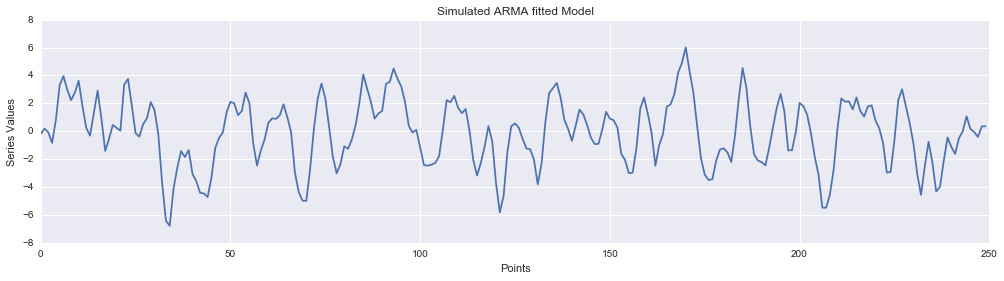

In [13]:
plt.figure(figsize = (17, 4))
plt.title("Simulated ARMA fitted Model")
plt.ylabel("Series Values");
plt.xlabel("Points")
plt.plot(y);

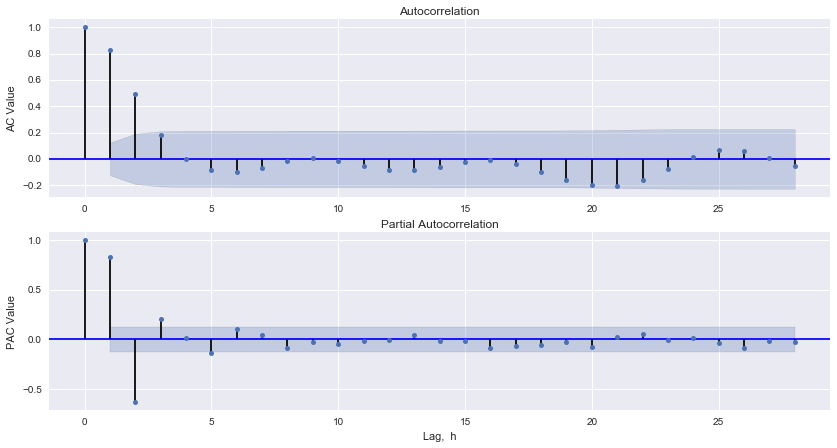

In [43]:
fig, axes = plt.subplots(2,1)
acf_fig = sm.graphics.tsa.plot_acf(y, lags=28, alpha=0.05, ax = axes[0]);
pacf = sm.graphics.tsa.plot_pacf(y, lags=28, alpha=0.05, ax = axes[1]);
axes[1].set_xlabel('Lag,  h')
axes[0].set_ylabel('AC Value')
axes[1].set_ylabel('PAC Value')
pacf.set_size_inches((14, 7));

The ACF plot shows that each $x_{t}$ series is highly correlated with **other subsets series** in the series up to a lag of $h = 2$. Which is expected since MA(p = 3). Recall that MA of 3 means that each point in the rolling average is a combination of 3 points from the orignal series. So it expected to see that each point rolling mean

The PACF shows that indiviudal points in the sereis are highly correlated with $x_{t}$ up to a lag of $h = 2$. Which is expected since AR(p = 3)

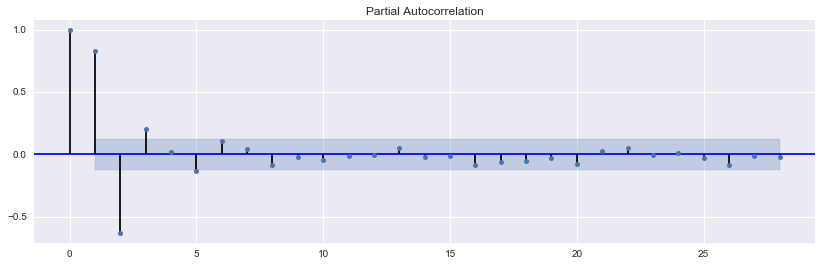

In [25]:
pacf = sm.graphics.tsa.plot_pacf(y, lags=28, alpha=0.05);
pacf.set_size_inches((14, 4));

### Little function to plot acf and pacf on one figure

In [6]:
def acf_pacf(ts, lags):
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts, lags=lags, ax=ax2)

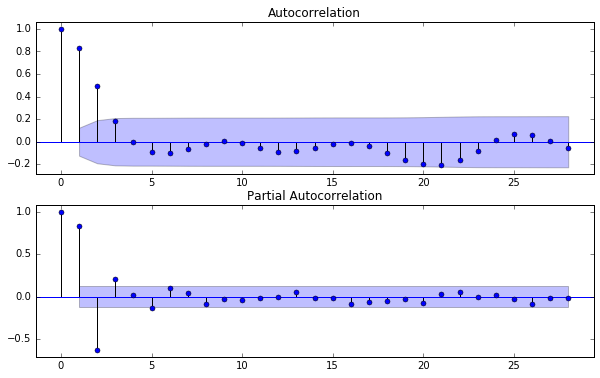

In [7]:
acf_pacf(y, 28)

### Stationary Time Series  

A stationary time series is one for which the statistical behavior of a set of observations $y_{t_1}, y_{t_2}, \dots, y_{t_k}$ is identical to that of the shifted set of observations $y_{t_{1+h}}, y_{t_{2+h}}, \dots, y_{t_{k+h}}$ for any collection of time points $t_1, t_2, \dots, t_k$ and for any shift $h$ (lag).  

This is the definition of strong stationarity and is too strong for most applications.  

### Weak Stationarity  

There is a relaxed definition, referred to as weak stationarity which requires only that the first and second moments satisfy the following constraints:  


$$ E(y_t) = \mu \text{ for all } t $$  


$$ \gamma_y (h) = E[(y_{t+h} - \mu)(y_t - \mu)] $$  

where $E$ is the usual expectation over the population density, $h$ is the time shift (lag), and  $\gamma_y (h)$ is called the *autocovariance function* and we additionally assert that  

$$\gamma_y (h) = \gamma_y (-h) $$  

In general, a stationary time series will have no predictable patterns in the long-term. 

### Assessing Stationarity  

Box-Jenkins models describe stationary time series, so we must
determine if the series is stationary and if not, transform it to
attain stationarity.  

We can use the ACF to determine if the time series is stationary    

* If the ACF dies down quickly (relatively few significant lags) we can consider the series stationary
* If it dies down slowly then we need to try some transformations to either remove the trend or stabilize the variance
* We will then use the new transformed series as the "working" time series for the remainder of the analysis  

In [8]:
import statsmodels.api as sm
data = sm.datasets.macrodata.load_pandas()
df = data.data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
y = df.m1

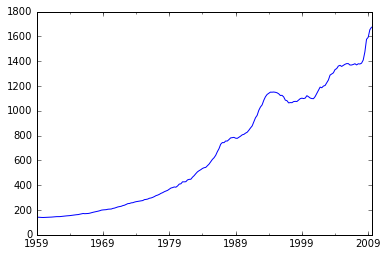

In [9]:
y.plot();

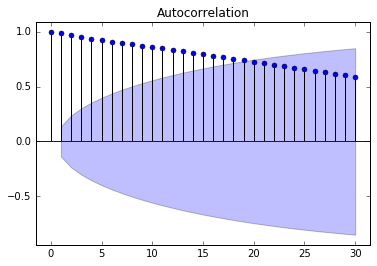

In [10]:
sm.graphics.tsa.plot_acf(y, lags = 30);

### Nonstationarity  

So time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times.  

Most time series are not stationary to begin with, so need to modify the series to improve the approximation of stationarity by  

* Detrending
* Differencing
* Transformations 

### Detrending  

The general version of a nonstationary time series is to assume
a general linear trend of the form  

$$ y_t = \beta_0 + \beta_1 t + \varepsilon_t  $$  

The natural thing to do is to consider the residual  

$$\hat{e}_t = y_t - \hat{\beta}_0 - \hat{\beta}_1 t $$  

as a plausible stationary series where $\beta_0$ and $\beta_1$ are the estimated intercept and slope coefficients based on least squares estimation.

### Differencing  

A common first step for achieving stationity is with the first difference
$$ \nabla  y_t = y_t - y_{t-1} $$  


$ \nabla  y_t$ is useful for series with trend.    

Higher order differences are defined as successive applications of the operator 5. For example, the second difference is  

$$ \nabla^2 y_t = \nabla[\nabla y_t] = [y_t - y_{t - 1}] - [y_{t - 1} - y_{t - 2}] $$  

If the model also contains a quadratic trend term, $ \nabla^2 y_t$ usually
reduces the model to a stationary form.

### Example: Global Temperatures  

Consider a global temperatures series: the data are a combination
of land-air average temperature anomalies for the years 1900-1997.  

<img src="images/global_temp.png" width="600">  

We first look at detrending the time series and examine the residuals from the model  

$$ \hat{Temp} = -12.2 + 0.006 \times Years $$  

<img src="images/global_detrend.png" width="600"> 

Next, look at differencing the time series with the first difference  

<img src="images/global_diff.png" width="600"> 

### Transformations  

A transformation that cuts down the values of larger peaks of a
time series and emphasizes the lower values may be effective in
reducing nonstationary behavior due to changing variance.  

Examples:  

* The logarithmic transformation, $log (y_t )$ usually exponential-base (natural log)
* The square root transformation, $\sqrt{y_t}$, useful for count data  
* More general transformations fall within the Box-Cox family

### Example: Johnson & Johnson Data  

The following figures shows quarterly earnings per share for
Johnson&Johnson from 1960 to 1980 before and after a log
transformation.  

<img src="images/johnson_example.png" width="600"> 

### ARIMA introduction  

* ARIMA(p,d,q) consists of: 
    * AR(p): persistence of history through AR terms
    * I(d): trend
    * MA(q): influence of past shocks through MA terms
* Can add higher order lags for seasonality

#### AR(p)  

AR(p) means auto-regressive of order p:  

$$ y_t = \phi_1  y_{t−1} + \dots + \phi_p  y_{t−p} + \varepsilon_t $$

#### MA(q)  

An MA(q) model captures the persistence of past shocks.  

MA(q) means moving average of order q:  

$$ y_t = \varepsilon_t +  \theta_1  \varepsilon_{t−1} + \dots + \theta_q \varepsilon_{t - q} $$

#### I(d)   

An I(d) model captures the non-stationary trend.  

* I(d) means integrated of order d:
$$ y_t = y_{t−1} + \mu + \varepsilon_t $$  
* d is how many times you must difference the series so that it is stationary
* Usually, $d \in {0, 1, 2}$
* Differencing should remove the trend component
* Compute differences with `np.diff(n=d)` or `pd.Series.diff(periods=d)`

### ARIMA models  

An ARIMA(p,d,q) is a general model which includes AR, I, and MA:  

* AR(p): AR of order p
* I(d): I of order d
* MA(q): MA of order q  

Remarks:
* AR, I, and/or MA may be missing from a general ARIMA model
* May also include seasonal components . . . Specify as ARIMA(p,d,q)(P,D,Q)
* If d = 0 $\Rightarrow$ ARIMA becomes ARMA

### Box-Jenkins Method  

General Steps:
* Identify the steps needed to achieve stationarity (detrending,
differencing, and/or transformations)
* Utilize ACF to see if stationarity is achieved. Lags should die
down quickly.
* Use ACF/PACF to identify potential models by where the lags
cut off.
    * PACF identifies AR(p)
    * ACF identifies MA(q)
* Fit model and examine residuals
    * If white noise, you're done
    * Else, identify additional components and update model

### Some examples of ARIMA models  

* AR(1) / ARIMA(1, 0, 0): ACF - exponential decay; PACF - spike at lag 1, no correlation for other lags.   

* AR(2) / ARIMA(2, 0, 0): ACF - a sine-wave shape pattern or a set of exponential decays; PACF - spikes at lags 1 and 2, no correlation for other lags.    

* MA(1) / ARIMA(0, 0, 1): ACF - spike at lag 1, no correlation for other lags; PACF - damps out exponentially.    

* MA(2) / ARIMA(0, 0, 2): ACF - spikes at lags 1 and 2, no correlation for other lags; PACF - a sine-wave shape pattern or a set of exponential decays.    

* ARMA(1, 1) / ARIMA(1, 0, 1): ACF - exponential decay starting at lag 1; PACF - exponential decay starting at lag 1.

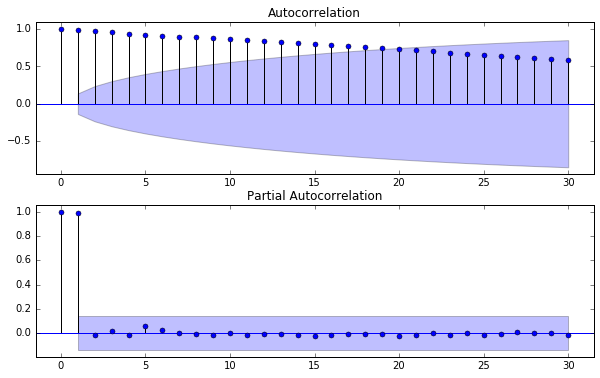

In [11]:
acf_pacf(y, 30)

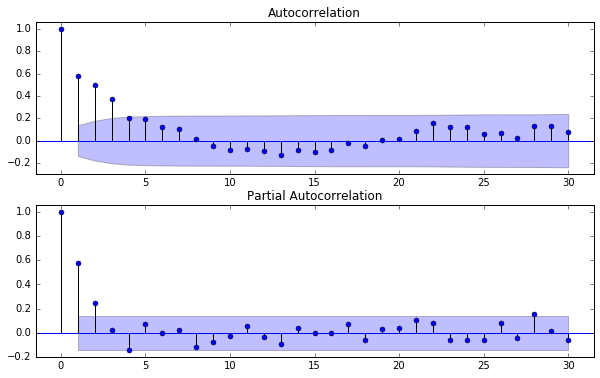

In [12]:
diff1 = y.diff(1)
acf_pacf(diff1[1:], 30)

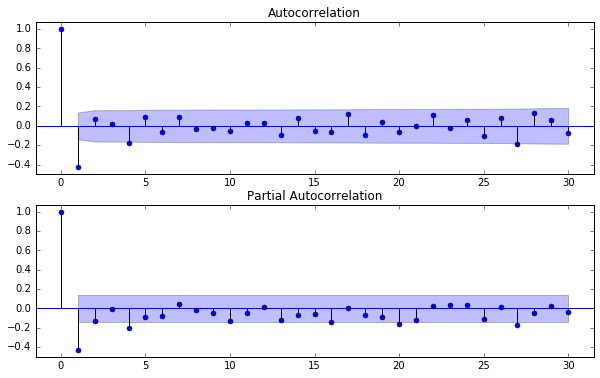

In [13]:
diff2 = diff1.diff(1)
acf_pacf(diff2[2:], 30)

In [14]:
model = sm.tsa.ARIMA(endog=y, order=[0,2,1])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D2.m1   No. Observations:                  201
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -761.368
Method:                       css-mle   S.D. of innovations             10.677
Date:                Mon, 26 Sep 2016   AIC                           1528.736
Time:                        13:01:00   BIC                           1538.645
Sample:                    09-30-1959   HQIC                          1532.746
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1842      0.349      0.528      0.598      -0.499       0.868
ma.L1.D2.m1    -0.5397      0.066     -8.184      0.000      -0.669      -0.410
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.8529           +0.0000j            1.8529            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
y_hat, stderr, pred_int = results.forecast(steps=10, alpha=0.05)
y_hat

array([ 1711.47165013,  1749.22749696,  1787.1675405 ,  1825.29178074,
        1863.60021768,  1902.09285133,  1940.76968168,  1979.63070873,
        2018.67593249,  2057.90535295])

## Exercise

We have a set of time series data in `data/ts.csv`. Let's try to model the data together.  

First, we are going to read in the data and take a look at it.  

In [16]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
ts = pd.read_csv('data/ts.csv')
ts.head()

,dates,y
0,1800-12-31 00:00:00,-0.204708
1,1801-12-31 00:00:00,0.120705
2,1802-12-31 00:00:00,-0.103497
3,1803-12-31 00:00:00,-0.908733
4,1804-12-31 00:00:00,0.509172


** (1) ** Check if the data look stationary.

** (2) ** Take the 1st order difference, and check again.

** (3) ** What model would you fit to  this time series data? Fit the model.

### Seasonal ARIMA  

Seasonal ARIMA (or SARIMA(p,d,q)x(P,D,Q)xL) are an extension
of ARIMA(p,d,q) models to address seasonality.  

Methods used are identical to those above except we focus on the
seasonal lags (L) including taking a seasonal difference $\nabla^D$ which is the difference in the seasonal lags.  

For Example:
* If quarterly data, we would focus on lags: 4, 8, 12, etc
* If monthly data, we would focus on lags: 12, 24, 36, etc
* If daily data, we might focus on lags: 7, 14, 21, etc
* If hourly data, we might focus on lags: 24, 48, 72, etc  

We can fit seasonal ARIMA model using `statsmodels.tsa.SARIMAX` in Python.

**Installation**

If you want to run the seasonal ARIMA module in `statsmodels` on your own laptop, use the following code to install 
the latest version of `statsmodels 0.7`

```python
git clone https://github.com/statsmodels/statsmodels.git
cd statsmodels
python setup.py build_ext --inplace
sudo python setup.py install
```


### Steps to fit a (seasonal) ARIMA model  

* Step 1: plot the data

* Step 2: differencing  
    * linear trend, no seasonality: 1st difference
    * curved trend, no seasonality: transform the data before differencing OR 2nd difference  
    * no trend, seasonality with period of S: take Sth difference
    * trend AND seasonality: take both differences  
    
* Step 3: plot ACF and PACF of the differenced data
    * *non-seasonal terms*:  Examine the early lags (1, 2, 3, ...) to judge non-seasonal terms. Spikes in the ACF (at low lags) indicate non-seasonal MA terms. Spikes in the PACF (at low lags) indicated possible non-seasonal AR terms.
    * *seasonal terms*:  Examine the patterns across lags that are multiples of S. Judge the ACF and PACF at the seasonal lags in the same way you do for the earlier lags.    

* Step 4: fit the model(s) that might be reasonable on the basis of Step 3. Include any differencing that you did before looking at the ACF and PACF; specify the original series as the data and then indicate the desired differencing when specifying parameters in the (S)ARIMA model.    

* Step 5: plot the ACF of the residuals to check the model fit. Compare AIC or BIC values if you tried several models. If the model is inadequate, go back to Step 2.  

### Example: Seasonal Quarterly Financial data from Johnson and Johnson 1960-1981

In [18]:
df= pd.read_csv('data/jj.txt')
df.head()

,earnings
0,0.71
1,0.63
2,0.85
3,0.44
4,0.61


In [19]:
dates = pd.date_range('1960','1981', freq='Q')
df['dates'] = dates
df['quarters'] = pd.DatetimeIndex(df['dates']).quarter
df=df.set_index('dates')
df.head()

,earnings,quarters
dates,,
1960-03-31,0.71,1
1960-06-30,0.63,2
1960-09-30,0.85,3
1960-12-31,0.44,4
1961-03-31,0.61,1


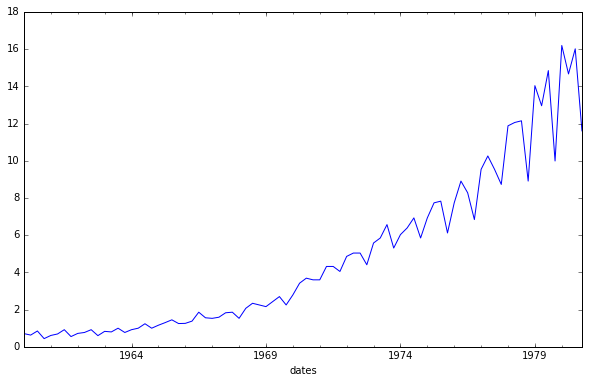

In [20]:
ts = pd.Series(df['earnings'])
ts.plot(figsize=(10,6));

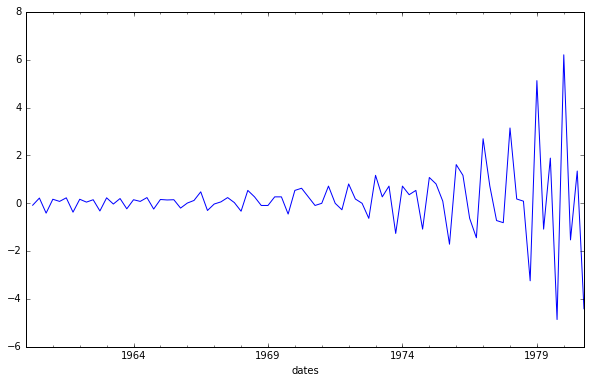

In [21]:
ts.diff(1).plot(figsize=(10,6));

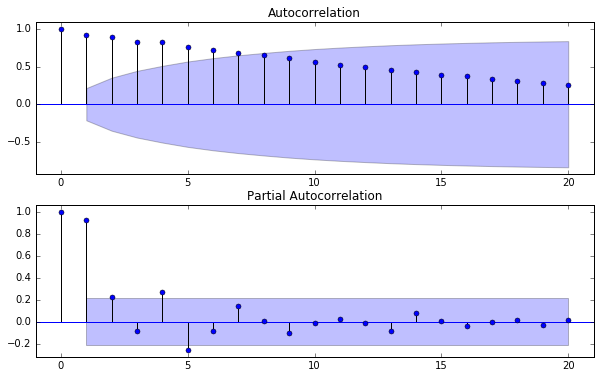

In [22]:
acf_pacf(ts,20)

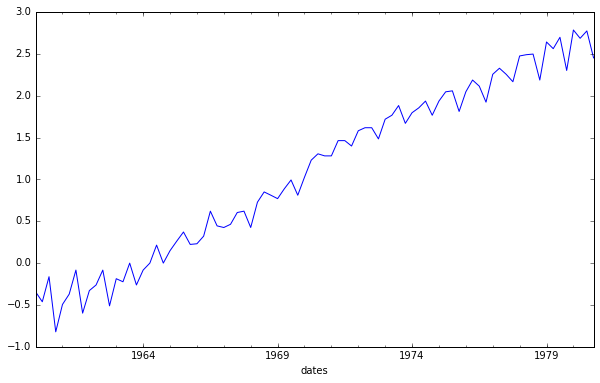

In [23]:
ts = pd.Series(np.log(df['earnings']))
ts.plot(figsize=(10,6));

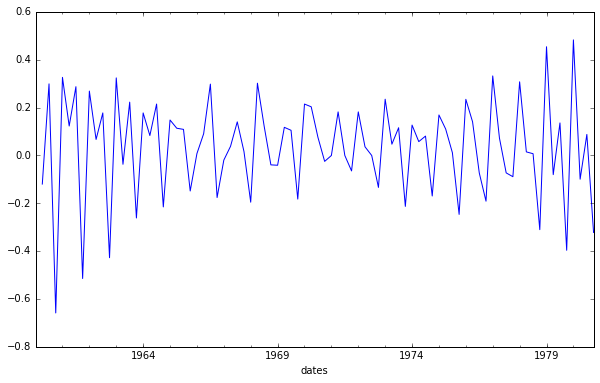

In [24]:
ts_diff=ts.diff(1)
ts_diff.plot(figsize=(10,6));

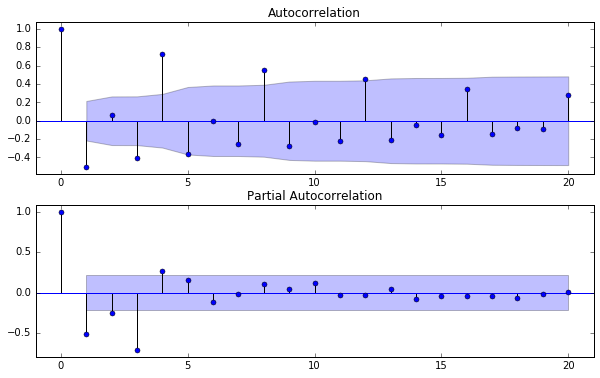

In [25]:
acf_pacf(ts_diff[1:],20)

dates
1960-03-31         NaN
1960-06-30         NaN
1960-09-30         NaN
1960-12-31         NaN
1961-03-31         NaN
1961-06-30    0.242778
1961-09-30   -0.011834
1961-12-31    0.144006
1962-03-31   -0.057351
1962-06-30   -0.056093
Name: earnings, dtype: float64

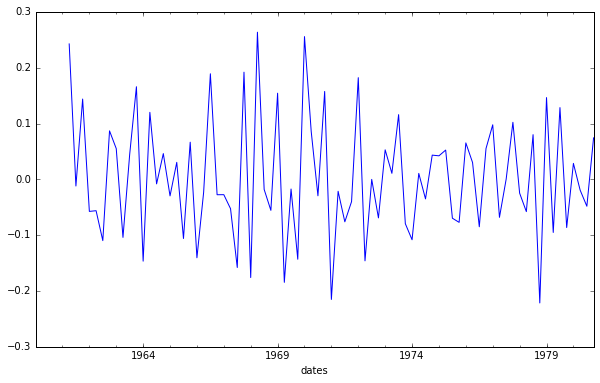

In [26]:
ts_sdiff = ts_diff.diff(4)
ts_sdiff.plot(figsize=(10,6))
ts_sdiff.head(10)

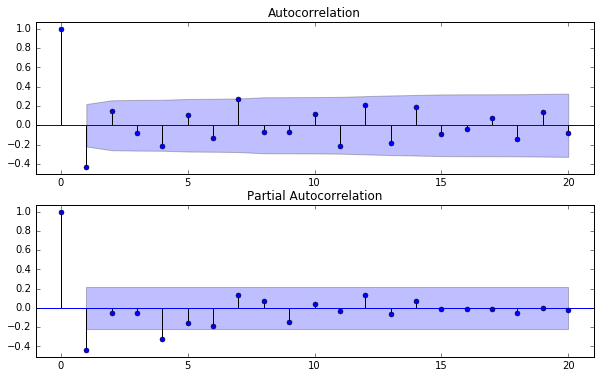

In [27]:
acf_pacf(ts_sdiff[5:], 20)

In [28]:
model=sm.tsa.SARIMAX(ts, order=(1,1,0), seasonal_order=(1,1,0,4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                          earnings   No. Observations:                   84
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 4)   Log Likelihood                  76.016
Date:                           Mon, 26 Sep 2016   AIC                           -146.032
Time:                                   13:01:05   BIC                           -138.739
Sample:                               03-31-1960   HQIC                          -143.100
                                    - 12-31-1980                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5153      0.093     -5.561      0.000      -0.697      -0.334
ar.S.L4       -0.3294      0.118     -2.788      0.005      -0.561      -0.098
sigma2         0.0085      0.002      5.219      0.000       0.005       0.012
===================================================================================
Ljung-Box (Q):                       38.65   Jarque-Bera (JB):                 3.18
Prob(Q):                              0.53   Prob(JB):                         0.20
Heteroskedasticity (H):               0.49   Skew:                             0.34
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

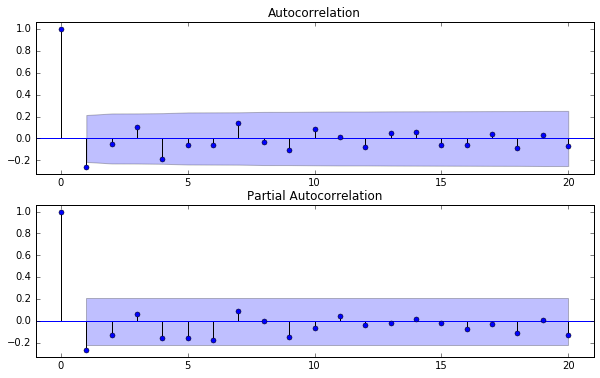

In [29]:
acf_pacf(pd.Series(model.resid,index=ts.index), 20)

In [30]:
model=sm.tsa.SARIMAX(ts, order=(0,1,1), seasonal_order=(1,1,0,4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                          earnings   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 4)   Log Likelihood                  78.457
Date:                           Mon, 26 Sep 2016   AIC                           -150.914
Time:                                   13:01:06   BIC                           -143.621
Sample:                               03-31-1960   HQIC                          -147.982
                                    - 12-31-1980                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6795      0.096     -7.104      0.000      -0.867      -0.492
ar.S.L4       -0.3218      0.108     -2.968      0.003      -0.534      -0.109
sigma2         0.0079      0.002      5.151      0.000       0.005       0.011
===================================================================================
Ljung-Box (Q):                       36.29   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.64   Prob(JB):                         0.45
Heteroskedasticity (H):               0.45   Skew:                             0.08
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

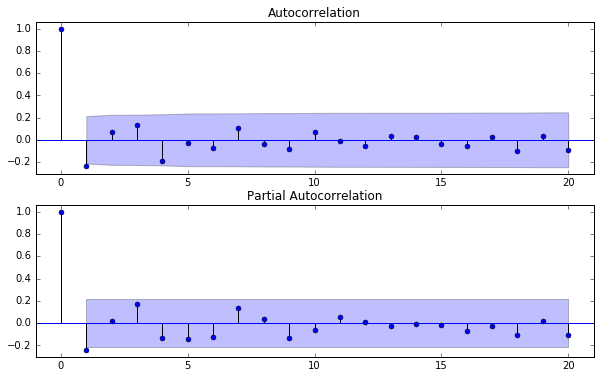

In [31]:
acf_pacf(pd.Series(model.resid, index=ts.index), 20)

In [32]:
model=sm.tsa.SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,0,4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                          earnings   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 4)   Log Likelihood                  78.459
Date:                           Mon, 26 Sep 2016   AIC                           -148.918
Time:                                   13:01:08   BIC                           -139.194
Sample:                               03-31-1960   HQIC                          -145.009
                                    - 12-31-1980                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0138      0.184     -0.075      0.940      -0.374       0.346
ma.L1         -0.6704      0.153     -4.381      0.000      -0.970      -0.370
ar.S.L4       -0.3263      0.115     -2.837      0.005      -0.552      -0.101
sigma2         0.0079      0.002      5.148      0.000       0.005       0.011
===================================================================================
Ljung-Box (Q):                       35.98   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.65   Prob(JB):                         0.45
Heteroskedasticity (H):               0.45   Skew:                             0.08
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

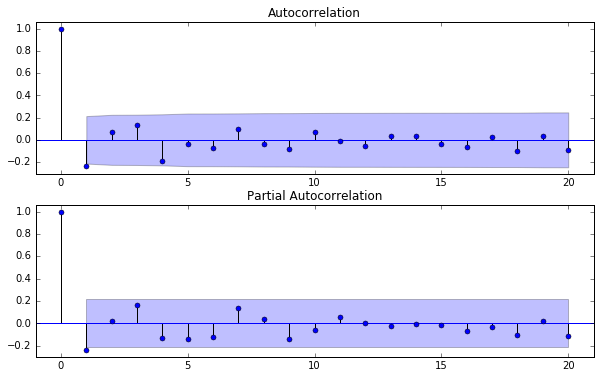

In [33]:
acf_pacf(pd.Series(model.resid, index=ts.index), 20)

In [34]:
model.forecast(steps = 10, alpha = 0.05)

1981-03-31    2.909642
1981-06-30    2.816915
1981-09-30    2.920641
1981-12-31    2.574377
1982-03-31    3.040523
1982-06-30    2.945681
1982-09-30    3.044286
1982-12-31    2.705950
1983-03-31    3.169364
1983-06-30    3.075212
Freq: Q-DEC, dtype: float64

In [35]:
np.exp(model.forecast(steps = 10, alpha = 0.05))

1981-03-31    18.350236
1981-06-30    16.725170
1981-09-30    18.553172
1981-12-31    13.123137
1982-03-31    20.916179
1982-06-30    19.023615
1982-09-30    20.995040
1982-12-31    14.968524
1983-03-31    23.792353
1983-06-30    21.654478
Freq: Q-DEC, dtype: float64

## Exercise  

Exploring Monthly Birth Data   

The number of live births (in hundreds of thousands) per month in the U.S. was 
collected for the past 31 years (`data/birth.txt`) starting in January 1980 and ending
December, 2010. We will be exploring this time series using various methods and predict
the birth counts for 2011.

In [36]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  
sb.set_style('darkgrid')

1) Load the data into a pandas dataframe.

In [37]:
df = pd.read_csv('data/birth.txt')

In [38]:
df.head()

,num_births
0,295
1,286
2,300
3,278
4,272


2) Using `pandas.date_range()` to create a `dates` variable 
   (from January 1980 and ending December, 2010).

In [39]:
dates = pd.date_range(start="1980", end = "2011", freq="M")

In [40]:
dates.shape

(372,)

3) Set the `dates` variable as the index of your dataframe.

In [41]:
df["date"] =  dates

In [42]:
df["months"] = pd.DatetimeIndex(df['date']).month

In [43]:
df=df.set_index('date')

In [44]:
df.head()

,num_births,months
date,,
1980-01-31,295,1
1980-02-29,286,2
1980-03-31,300,3
1980-04-30,278,4
1980-05-31,272,5


4) Turn the `num_births` into a time series using `pd.Series()`.

In [45]:
ts = pd.Series(df["num_births"])

In [46]:
ts.head()

date
1980-01-31    295
1980-02-29    286
1980-03-31    300
1980-04-30    278
1980-05-31    272
Name: num_births, dtype: int64

5) Plot the overall data. What are your thoughts about the general pattern 
and or seasonal variation?

### Steps to fit a (seasonal) ARIMA model  

* Step 1: plot the data

* Step 2: differencing  
    * linear trend, no seasonality: 1st difference
    * curved trend, no seasonality: transform the data before differencing OR 2nd difference  
    * no trend, seasonality with period of S: take Sth difference
    * trend AND seasonality: take both differences  
    
* Step 3: plot ACF and PACF of the differenced data
    * *non-seasonal terms*:  Examine the early lags (1, 2, 3, ...) to judge non-seasonal terms. Spikes in the ACF (at low lags) indicate non-seasonal MA terms. Spikes in the PACF (at low lags) indicated possible non-seasonal AR terms.
    * *seasonal terms*:  Examine the patterns across lags that are multiples of S. Judge the ACF and PACF at the seasonal lags in the same way you do for the earlier lags.    

* Step 4: fit the model(s) that might be reasonable on the basis of Step 3. Include any differencing that you did before looking at the ACF and PACF; specify the original series as the data and then indicate the desired differencing when specifying parameters in the (S)ARIMA model.    

* Step 5: plot the ACF of the residuals to check the model fit. Compare AIC or BIC values if you tried several models. If the model is inadequate, go back to Step 2. 

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
decomposition = seasonal_decompose(df["num_births"]);

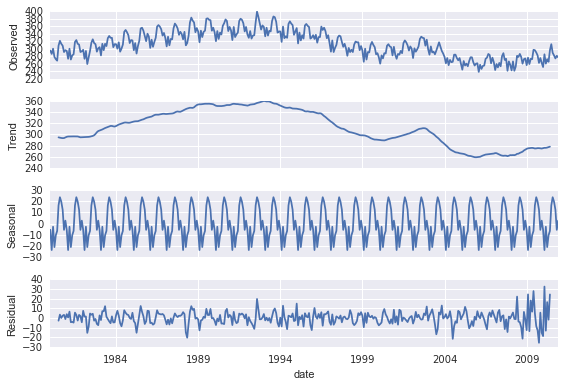

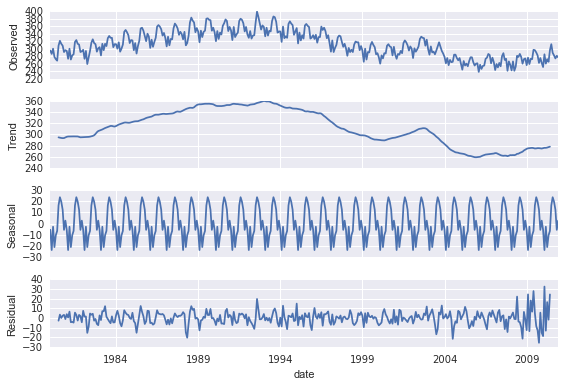

In [49]:
decomposition.plot()

The obsversed data has been broken down into the trend, seasonal, and residual plots. The trend plot shows us that the  moving is mean. There doesn't seem to be any heteroskedasticity present (time dependent variance), but we'll check for that. There is certainly seasonality present. 

trend AND seasonality --> take both differences

In [50]:
df["first_difference"] = df["num_births"] - df["num_births"].shift()

In [51]:
df["trend_n_seasonal_difference"] = df["first_difference"] - df["first_difference"].shift(12)

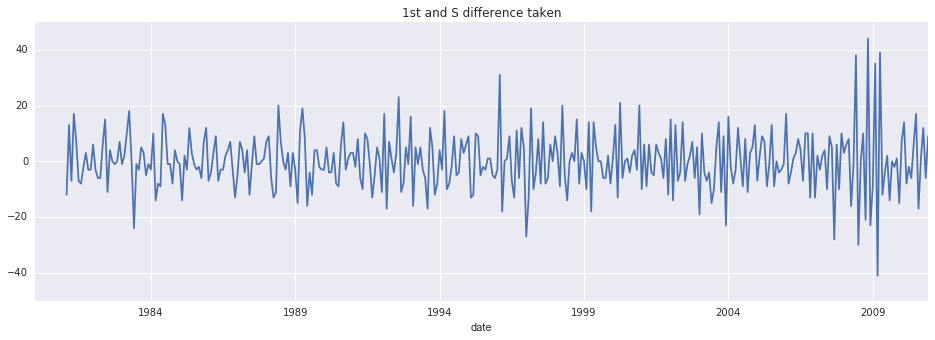

In [52]:
df["trend_n_seasonal_difference"].plot(figsize = (16,5), title="1st and S difference taken");

In [53]:
df['Original Variance'] = pd.rolling_var( df["num_births"] , 30, min_periods=None, freq=None, center=True)  
df['Difference Variance'] = pd.rolling_var( df["trend_n_seasonal_difference"] , 30, min_periods=None, freq=None, center=True)

/Users/Alexander/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  if __name__ == '__main__':
/Users/Alexander/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=True).var()
  from ipykernel import kernelapp as app


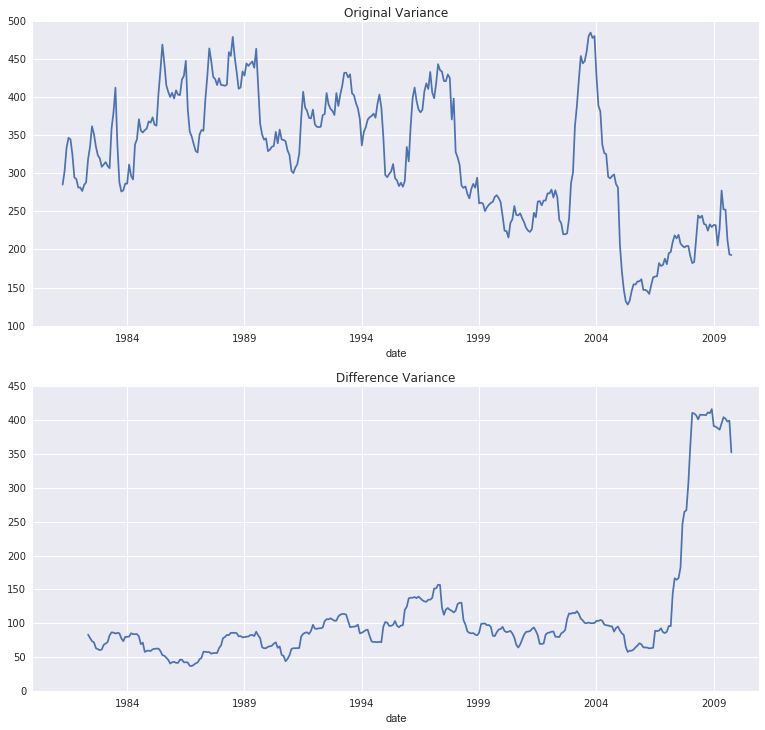

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(13, 12))
df['Original Variance'].plot(ax=ax[0], title = "Original Variance")
df['Difference Variance'].plot(ax=ax[1], title = "Difference Variance")

In [55]:
from statsmodels.tsa.stattools import acf, pacf

In [56]:
acf?

In [57]:
# nlags - number of points in the lag sequence and non lag sequence; don't necessary want to AC all points
lag_correlations = acf(df['trend_n_seasonal_difference'].dropna().iloc[1:], nlags=50) 
lag_partial_correlations = pacf(df['trend_n_seasonal_difference'].dropna().iloc[1:], nlags=50) 

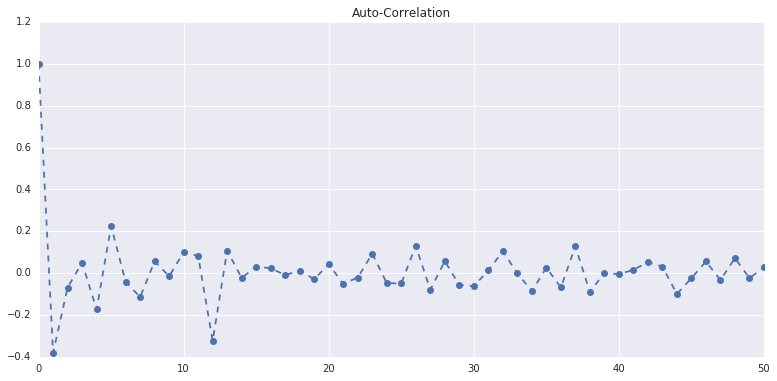

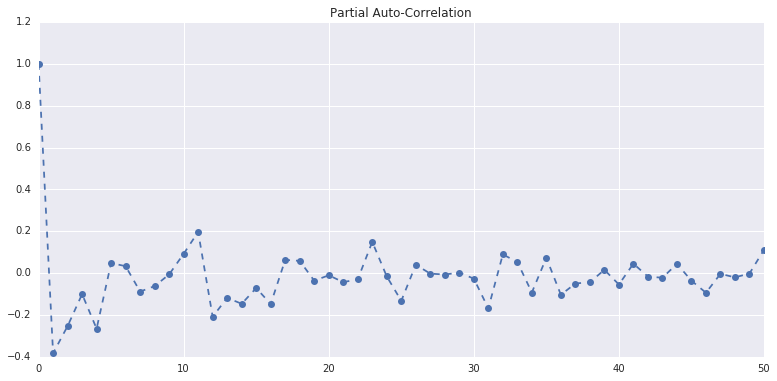

In [58]:
fig, ax = plt.subplots(figsize=(13,6)) ;
plt.title("Auto-Correlation")
ax.plot(lag_correlations, marker='o', linestyle='--');

fig, ax = plt.subplots(figsize=(13,6)) ;
plt.title("Partial Auto-Correlation")
ax.plot(lag_partial_correlations, marker='o', linestyle='--');

We can see that the first point is perfectly correlated with itself. A couple of points are correlated with a magnitude of 0.4, but all other points nearly zero correlation. 

The data now centered around zero and seems to no longer have a non-linear trend. 

6) Fit a ARIMA or seasonal ARIMA model to the birth data.